# **PROBLEM STATEMENT**

* This tutorial takes a practical and coding-focused approach. We'll learn how to apply logistic regression to a real-world dataset
* QUESTION: The Rain in Australia dataset contains about 10 years of daily weather observations from numerous Australian weather stations. Here's a small sample from the dataset:
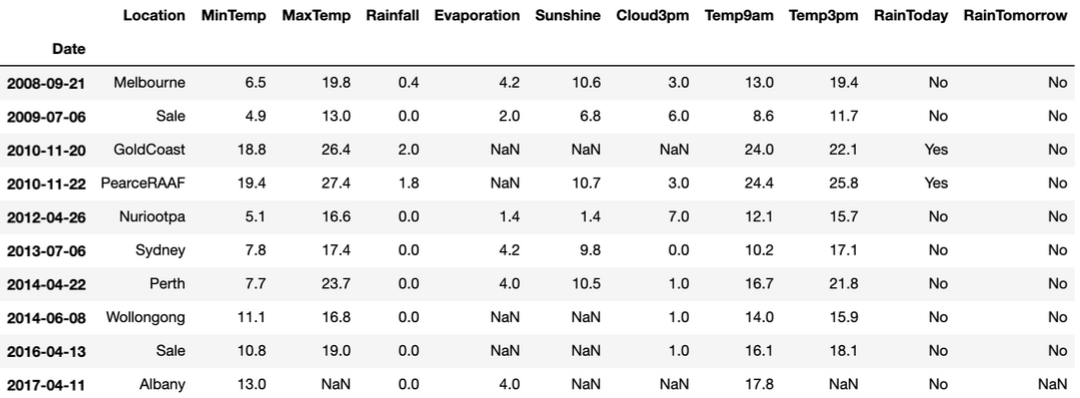

* As a data scientist at the Bureau of Meteorology, you are tasked with **creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow**.

# **Linear Regression VS Logistic Regression**
In the previous tutorial, we attempted to predict a person's annual medical charges using linear regression. In this tutorial, we'll use logistic regression, which is better suited for classification problems like predicting whether it will rain tomorrow. Identifying whether a given problem is a classfication or regression problem is an important first step in machine learning.

# **Classification Problems**

Problems where each input must be assigned a discrete category (also called label or class) are known as classification problems.

Here are some examples of classification problems:

 1. **Rainfall prediction**(https://jovian.com/outlink?url=https%3A%2F%2Fkaggle.com%2Fjsphyg%2Fweather-dataset-rattle-package): Predicting whether it will rain tomorrow using today's weather data (classes are "Will Rain" and "Will Not Rain")
 2. **Breast cancer detection**(https://jovian.com/outlink?url=https%3A%2F%2Fwww.kaggle.com%2Fuciml%2Fbreast-cancer-wisconsin-data): Predicting whether a tumor is "benign" (noncancerous) or "malignant" (cancerous) using information like its radius, texture etc.
 3. **Loan Repayment Prediction**(https://jovian.com/outlink?url=https%3A%2F%2Fwww.kaggle.com%2Fc%2Fhome-credit-default-risk) - Predicting whether applicants will repay a home loan based on factors like age, income, loan amount, no. of children etc.
 4. **Handwritten Digit Recognition**(https://jovian.com/outlink?url=https%3A%2F%2Fwww.kaggle.com%2Fc%2Fdigit-recognizer) - Identifying which digit from 0 to 9 a picture of handwritten text represents.
 
 **EXERCISE: Replicate the steps followed in this tutorial with each of the above datasets.**

Classification problems can be binary (yes/no) or multiclass (picking one of many classes).


# **Regression**
Problems where a continuous numeric value must be predicted for each input are known as regression problems.

Here are some example of regression problems:
* **Medical Charges prediction**(https://jovian.com/outlink?url=https%3A%2F%2Fwww.kaggle.com%2Fsubhakarks%2Fmedical-insurance-cost-analysis-and-prediction)
* **House Price Prediction**(https://jovian.com/outlink?url=https%3A%2F%2Fwww.kaggle.com%2Fc%2Fhouse-prices-advanced-regression-techniques)
* **Ocean Temperature Prediction**(https://jovian.com/outlink?url=https%3A%2F%2Fwww.kaggle.com%2Fsohier%2Fcalcofi)
* **Weather Temperature Prediction**(https://jovian.com/outlink?url=https%3A%2F%2Fwww.kaggle.com%2Fbudincsevity%2Fszeged-weather)

# **Linear Regression for Solving Regression Problems**
Linear regression is a commonly used technique for solving regression problems. In a linear regression model, the target is modeled as a **linear combination (or weighted sum) of input features**. The **predictions from the model are evaluated using a loss function** like the **Root Mean Squared Error (RMSE)**.

Here's a visual summary of how a linear regression model is structured:

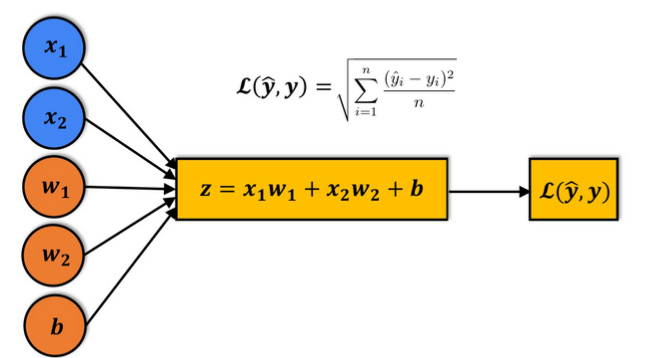

# **Logistic Regression for solving classification problems**

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model:

   1. We take linear combination (or weighted sum of the input features)
   2. We apply the sigmoid function to the result to obtain a number between 0 and 1
   3. This number represents the probability of the input being classified as "Yes"
   4. Instead of RMSE, the cross entropy loss function is used to evaluate the results

Here's a visual summary of how a logistic regression model is structured (source):

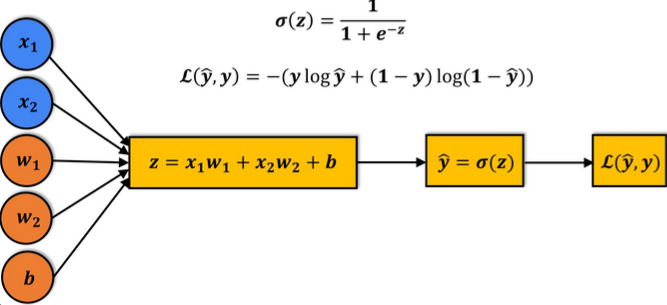

**The sigmoid function applied to the linear combination of inputs has the following formula:**

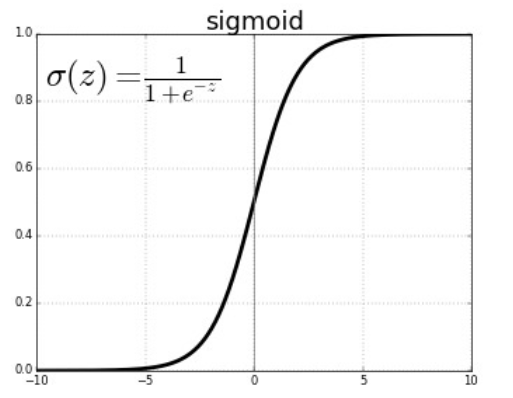

The output of the sigmoid function is called a logistic, hence the name logistic regression. For a mathematical discussion of logistic regression, **sigmoid activation** and **cross entropy**. Logistic regression can also be applied to multi-class classification problems, with a few modifications.

# **Machine Learning Workflow**

Whether we're solving a regression problem using linear regression or a classification problem using logistic regression, the workflow for training a model is exactly the same:

   1. **We initialize a model with random parameters (weights & biases)**.
   2. **We pass some inputs into the model to obtain predictions**.
   3. **We compare the model's predictions with the actual targets using the loss function**.
   4. **We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model**
   5. **We repeat steps 1 to 4 till the predictions from the model are good enough**.


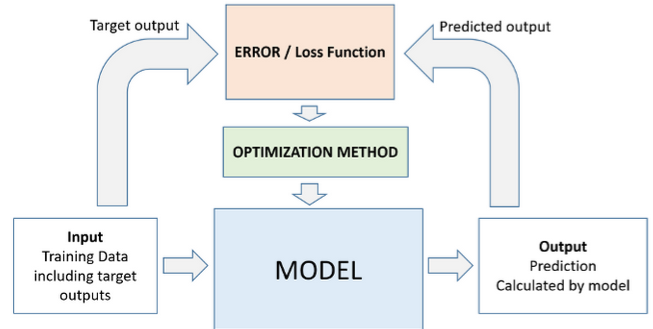

Classification and regression are both supervised machine learning problems, because they use labeled data. Machine learning applied to unlabeled data is known as unsupervised learning (image source).

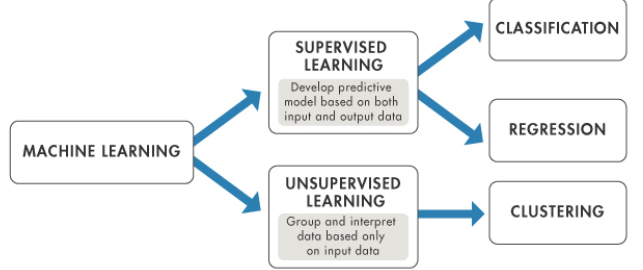

In this tutorial, we'll train a logistic regression model using the Rain in Australia dataset to predict whether or not it will rain at a location tomorrow, using today's data. This is a binary classification problem.

# **Downloading Data**

In [1]:
import pandas as pd
raw_df = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

**The dataset contains over 145,000 rows and 23 columns. The dataset contains date, numeric and categorical columns. Our objective is to create a model to predict the value in the column RainTomorrow.**

Let's check the data types and missing values in the various columns.

In [2]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

While we should be able to fill in missing values for most columns, it might **be a good idea to discard the rows where the value of RainTomorrow or RainToday** is missing to make our analysis and modeling simpler (since one of them is the **target variable**, and the other is likely to be very closely related to the target variable).

In [3]:
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)
raw_df  #How would you deal with the missing values in the other columns?

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145454       NaN           E           31.0        ESE  ...        59.0   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145454         27.0       1024.7       1021.2       NaN       NaN      9.4   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145454     20.9         No            No  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  

[140787 rows x 23 columns]

# **Data Analysis and Visualisation**

In [4]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [5]:
px.histogram(raw_df, x='Location',title='Location VS Rainy Days',  color='RainToday')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [6]:
px.histogram(raw_df, x='Temp3pm', title='Temeperature at 3pm vs RainTomorrow', color='RainTomorrow')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [7]:
px.histogram(raw_df, x='RainTomorrow', title='RainTomorrow VS RainToday', color='RainToday')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [8]:
px.scatter(raw_df.sample(2000), 
           x='MinTemp',
           y='MaxTemp', 
           title='Min Temp Vs Max Temp', 
           color='RainToday'
           )

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [9]:
px.scatter(raw_df.sample(2000), 
           x='Temp3pm', 
           y='Humidity3pm', 
           title = 'Temperature at 3pm vs Humidity at 3pm', 
           color='RainTomorrow')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# **Training, Validation and Train sets**

While building real-world machine learning models, it is quite common to split the dataset into three parts:

 1. Training set - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique.

 2. Validation set - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. Learn more here.

  3. Test set - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.
  
  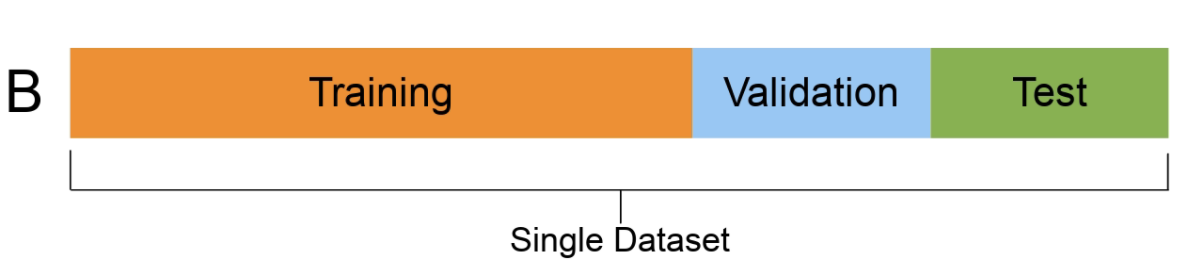
  
  As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.

When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the train_test_split utility from scikit-learn. Learn more about it here:https://jovian.com/outlink?url=https%3A%2F%2Fscikit-learn.org%2Fstable%2Fmodules%2Fgenerated%2Fsklearn.model_selection.train_test_split.html
  


In [10]:
raw_df.shape

(140787, 23)

In [11]:
from sklearn.model_selection import train_test_split

**Let's first split test set and trainvalue set, then from trainvalue set we will separate train and value sets separetely**

In [12]:
#Here 20% -> Test set, 20% -> Validation set, 60% -> Train set
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [13]:
print('Train set shape:', train_df.shape)
print('Test set shape:', test_df.shape)
print('Validation set shape:', val_df.shape)

Train set shape: (84471, 23)
Test set shape: (28158, 23)
Validation set shape: (28158, 23)


**However, while working with dates, it's often a better idea to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.**

For the current dataset, we can use the Date column in the dataset to create another column for year. We'll pick the last two years for the test set, and one year before it for the validation set.

In [14]:
plt.title('No. of rows per year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)

<Axes: title={'center': 'No. of rows per year'}, xlabel='Date', ylabel='count'>

In [15]:
year = pd.to_datetime(raw_df.Date).dt.year
train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [16]:
print('Train set shape:', train_df.shape)
print('Test set shape:', test_df.shape)
print('Validation set shape:', val_df.shape)

Train set shape: (97988, 23)
Test set shape: (25710, 23)
Validation set shape: (17089, 23)


**While not a perfect 60-20-20 split, we have ensured that the test validation and test sets both contain data for all 12 months of the year.**

In [17]:
train_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
144548  2014-12-27    Uluru     16.9     33.2       0.0          NaN   
144549  2014-12-28    Uluru     15.1     36.8       0.0          NaN   
144550  2014-12-29    Uluru     17.3     37.8       0.0          NaN   
144551  2014-12-30    Uluru     20.1     38.5       0.0          NaN   
144552  2014-12-31    Uluru     22.5     39.6       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
144548       NaN         SSE           43.0        ESE  ...        22.0   
144549       NaN          NE           31.0        ENE  ...        16.0   
144550       NaN         ESE           39.0        ESE  ...        15.0   
144551       NaN         ESE           43.0        ESE  ...        22.0   
144552       NaN         WNW           76.0        ENE  ...        16.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
144548         13.0       1014.1       1009.8       NaN       NaN     23.7   
144549          8.0       1012.6       1007.6       NaN       NaN     28.9   
144550          8.0       1011.9       1008.0       NaN       NaN     29.7   
144551          9.0       1014.0       1009.2       NaN       NaN     29.8   
144552          9.0       1012.1       1006.2       NaN       NaN     30.1   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
144548     31.8         No            No  
144549     34.8         No            No  
144550     35.7         No            No  
144551     37.2         No            No  
144552     37.4         No            No  

[97988 rows x 23 columns]

In [18]:
val_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2133    2015-01-01   Albury     11.4     33.5       0.0          NaN   
2134    2015-01-02   Albury     15.5     39.6       0.0          NaN   
2135    2015-01-03   Albury     17.1     38.3       0.0          NaN   
2136    2015-01-04   Albury     26.0     33.1       0.0          NaN   
2137    2015-01-05   Albury     19.0     35.2       0.0          NaN   
...            ...      ...      ...      ...       ...          ...   
144913  2015-12-27    Uluru     20.5     34.7       0.0          NaN   
144914  2015-12-28    Uluru     18.0     36.4       0.0          NaN   
144915  2015-12-29    Uluru     17.5     37.1       0.0          NaN   
144916  2015-12-30    Uluru     20.0     38.9       0.0          NaN   
144917  2015-12-31    Uluru     19.3     37.4       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
2133         NaN         WSW           30.0        ESE  ...        45.0   
2134         NaN          NE           56.0        ESE  ...        45.0   
2135         NaN         NNE           48.0         NE  ...        35.0   
2136         NaN         NNE           41.0        ESE  ...        46.0   
2137         NaN           E           33.0        SSE  ...        60.0   
...          ...         ...            ...        ...  ...         ...   
144913       NaN           E           52.0        ESE  ...        23.0   
144914       NaN         ESE           54.0          E  ...        17.0   
144915       NaN           E           56.0          E  ...        12.0   
144916       NaN           E           59.0          E  ...        12.0   
144917       NaN          SE           56.0        ESE  ...        46.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2133           14.0       1013.5       1011.0       NaN       NaN     21.0   
2134           12.0       1016.0       1012.4       NaN       NaN     25.6   
2135           19.0       1017.9       1012.3       NaN       NaN     29.2   
2136           37.0       1013.6       1012.1       8.0       5.0     27.4   
2137           34.0       1017.4       1014.7       8.0       NaN     25.6   
...             ...          ...          ...       ...       ...      ...   
144913         12.0       1013.2       1010.1       NaN       NaN     24.3   
144914          7.0       1014.7       1010.9       NaN       NaN     26.7   
144915          7.0       1012.6       1007.5       NaN       NaN     28.1   
144916         12.0       1007.2       1002.6       NaN       1.0     31.3   
144917         18.0       1007.3       1003.7       NaN       NaN     25.8   

        Temp3pm  RainToday  RainTomorrow  
2133       32.7         No            No  
2134       38.2         No            No  
2135       37.0         No            No  
2136       30.9         No            No  
2137       32.5         No            No  
...         ...        ...           ...  
144913     33.0         No            No  
144914     35.0         No            No  
144915     34.7         No            No  
144916     38.4         No            No  
144917     35.8         No            No  

[17089 rows x 23 columns]

In [19]:
test_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2498    2016-01-01   Albury     20.4     37.6       0.0          NaN   
2499    2016-01-02   Albury     20.9     33.6       0.4          NaN   
2500    2016-01-03   Albury     18.4     23.1       2.2          NaN   
2501    2016-01-04   Albury     17.3     23.7      15.6          NaN   
2502    2016-01-05   Albury     15.5     22.9       6.8          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
2498         NaN         ENE           54.0        NaN  ...        46.0   
2499         NaN         SSE           50.0        SSE  ...        54.0   
2500         NaN         ENE           48.0        ESE  ...        62.0   
2501         NaN         SSE           39.0         SE  ...        74.0   
2502         NaN         ENE           31.0         SE  ...        92.0   
...          ...         ...            ...        ...  ...         ...   
145454       NaN           E           31.0        ESE  ...        59.0   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2498           17.0       1013.4       1009.2       7.0       3.0     26.1   
2499           30.0       1011.1       1008.4       8.0       8.0     24.8   
2500           67.0       1014.0       1014.8       8.0       8.0     21.8   
2501           65.0       1017.9       1016.5       8.0       8.0     19.2   
2502           63.0       1016.3       1013.9       8.0       8.0     17.2   
...             ...          ...          ...       ...       ...      ...   
145454         27.0       1024.7       1021.2       NaN       NaN      9.4   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RainToday  RainTomorrow  
2498       36.7         No            No  
2499       31.7         No           Yes  
2500       19.5        Yes           Yes  
2501       21.6        Yes           Yes  
2502       22.2        Yes            No  
...         ...        ...           ...  
145454     20.9         No            No  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  

[25710 rows x 23 columns]

# **Identifying Input and Target columns**

* Often, not all the columns in a dataset are useful for training a model. In the current dataset, we can ignore the Date column, since we only want to weather conditions to make a prediction about whether it will rain the next day.
* **Here define a general inputs and targets after which we can make copy each for test, train and val sets**

Let's create a list of input columns, and also identify the target column.

In [20]:
input_colns = list(train_df.columns)[1:-1] #Array slicing from index 1 to last index(-1)
#target = train_df.RainTomorrow (Can be written as below)

target_coln = 'RainTomorrow'

In [21]:
print(input_colns)
print(target_coln)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']
RainTomorrow


**We can now create inputs and targets for the training, validation and test sets for further processing and model training.**

In [22]:
#For train set
train_inputs = train_df[input_colns].copy()
train_target = train_df[target_coln].copy()

In [23]:
# For Val set
val_inputs = val_df[input_colns].copy()
val_target = val_df[target_coln].copy()

In [24]:
# For Test set
test_inputs = test_df[input_colns].copy()
test_target = test_df[target_coln].copy()

In [25]:
train_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
144548    Uluru     16.9     33.2       0.0          NaN       NaN   
144549    Uluru     15.1     36.8       0.0          NaN       NaN   
144550    Uluru     17.3     37.8       0.0          NaN       NaN   
144551    Uluru     20.1     38.5       0.0          NaN       NaN   
144552    Uluru     22.5     39.6       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
0                W           44.0          W        WNW  ...          24.0   
1              WNW           44.0        NNW        WSW  ...          22.0   
2              WSW           46.0          W        WSW  ...          26.0   
3               NE           24.0         SE          E  ...           9.0   
4                W           41.0        ENE         NW  ...          20.0   
...            ...            ...        ...        ...  ...           ...   
144548         SSE           43.0        ESE        SSE  ...          26.0   
144549          NE           31.0        ENE         SW  ...          20.0   
144550         ESE           39.0        ESE        SSE  ...           9.0   
144551         ESE           43.0        ESE        SSW  ...          17.0   
144552         WNW           76.0        ENE        SSW  ...          13.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0              71.0         22.0       1007.7       1007.1       8.0   
1              44.0         25.0       1010.6       1007.8       NaN   
2              38.0         30.0       1007.6       1008.7       NaN   
3              45.0         16.0       1017.6       1012.8       NaN   
4              82.0         33.0       1010.8       1006.0       7.0   
...             ...          ...          ...          ...       ...   
144548         22.0         13.0       1014.1       1009.8       NaN   
144549         16.0          8.0       1012.6       1007.6       NaN   
144550         15.0          8.0       1011.9       1008.0       NaN   
144551         22.0          9.0       1014.0       1009.2       NaN   
144552         16.0          9.0       1012.1       1006.2       NaN   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
0            NaN     16.9     21.8         No  
1            NaN     17.2     24.3         No  
2            2.0     21.0     23.2         No  
3            NaN     18.1     26.5         No  
4            8.0     17.8     29.7         No  
...          ...      ...      ...        ...  
144548       NaN     23.7     31.8         No  
144549       NaN     28.9     34.8         No  
144550       NaN     29.7     35.7         No  
144551       NaN     29.8     37.2         No  
144552       NaN     30.1     37.4         No  

[97988 rows x 21 columns]

In [26]:
train_target

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

**Let's also identify which of the columns are numerical and which ones are categorical. This will be useful later, as we'll need to convert the categorical data to numbers for training a logistic regression model.**

In [27]:
import numpy as np  ##The numeric and categ columns are converted to LISTS
numeric_colns = train_inputs.select_dtypes(include=np.number).columns.tolist()
categ_colns = train_inputs.select_dtypes('object').columns.tolist()

**Let's check some statistics in numeric colns**

In [28]:
train_inputs[numeric_colns].describe() ##Since always the input is a 2d array, numeric_colns is array it is inputed 

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

Do the ranges of the numeric columns seem reasonable? If not, we may have to do some **data cleaning** as well.

Let's also check the number of categories in each of the categorical columns.

In [29]:
train_inputs[categ_colns].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

# **Imputing Missing Numeric Data -> DATA CLEANING**

* Machine learning models can't work with missing numerical data. The process of filling missing values is called imputation.
* There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the SimpleImputer class from sklearn.impute.



In [30]:
from sklearn.impute import SimpleImputer

In [31]:
imputer = SimpleImputer(strategy='mean')

**Before we perform imputation, let's check the no. of missing values in each numeric column.**

In [32]:
raw_df[numeric_colns].isna().sum() ##Command for checking the no. of missing values in each column(indicates NaN)

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

**These values are spread across the training, test and validation sets. You can also check the no. of missing values individually for `train_inputs`, `val_inputs` and `test_inputs`.**

In [33]:
train_inputs[numeric_colns].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
Temp3pm            596
dtype: int64

In [34]:
test_df[numeric_colns].isna().sum()

MinTemp            120
MaxTemp             91
Rainfall             0
Evaporation      15028
Sunshine         17721
WindGustSpeed     1402
WindSpeed9am       110
WindSpeed3pm      1100
Humidity9am        253
Humidity3pm       1724
Pressure9am       2654
Pressure3pm       2661
Cloud9am         11131
Cloud3pm         13139
Temp9am             60
Temp3pm           1557
dtype: int64

**The first step in imputation is to fit the imputer to the data i.e. compute the chosen statistic (e.g. mean) for each column in the dataset.**

In [35]:
imputer.fit(raw_df[numeric_colns])

SimpleImputer()

**After calling fit, the computed statistic for each column is stored in the statistics_ property of imputer.**

In [36]:
imputer.statistics_

array([  12.18482387,   23.2351203 ,    2.34997407,    5.47251551,
          7.63053986,   39.97051989,   13.99049609,   18.63114078,
         68.82683277,   51.44928835, 1017.65457715, 1015.25796259,
          4.43116082,    4.49925023,   16.98706639,   21.69318269])

In [37]:
list(imputer.statistics_)

[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991,
 21.69318269001107]

**The missing values in the training, test and validation sets can now be filled in using the transform method of imputer.**

In [38]:
train_df[numeric_colns] = imputer.transform(train_df[numeric_colns])
val_df[numeric_colns] = imputer.transform(val_df[numeric_colns])
test_df[numeric_colns] = imputer.transform(test_df[numeric_colns])

/tmp/ipykernel_18/670971339.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_18/670971339.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_18/670971339.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
train_df[numeric_colns].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [40]:
val_df[numeric_colns].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [41]:
test_df[numeric_colns].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

# Other Imputation Techniques
https://scikit-learn.org/stable/modules/impute.html

# **Scaling Numeric Features**

Another good practice is to scale numeric features to a small range of values e.g. (0,1)(0,1) or (−1,1)(−1,1). Scaling numeric features **ensures that no particular feature has a disproportionate impact on the model's loss**. Optimization algorithms also work better in practice with smaller numbers.
The numeric columns in our dataset have varying ranges.

In [42]:
raw_df[numeric_colns].describe()

MinTemp       MaxTemp       Rainfall   Evaporation      Sunshine  \
count  140319.000000  140480.00000  140787.000000  81093.000000  73982.000000   
mean       12.184824      23.23512       2.349974      5.472516      7.630540   
std         6.403879       7.11450       8.465173      4.189132      3.781729   
min        -8.500000      -4.80000       0.000000      0.000000      0.000000   
25%         7.600000      17.90000       0.000000      2.600000      4.900000   
50%        12.000000      22.60000       0.000000      4.800000      8.500000   
75%        16.800000      28.30000       0.800000      7.400000     10.700000   
max        33.900000      48.10000     371.000000    145.000000     14.500000   

       WindGustSpeed   WindSpeed9am   WindSpeed3pm    Humidity9am  \
count  131682.000000  139732.000000  138256.000000  139270.000000   
mean       39.970520      13.990496      18.631141      68.826833   
std        13.578201       8.886210       8.798096      19.063650   
min         6.000000       0.000000       0.000000       0.000000   
25%        31.000000       7.000000      13.000000      57.000000   
50%        39.000000      13.000000      19.000000      70.000000   
75%        48.000000      19.000000      24.000000      83.000000   
max       135.000000     130.000000      87.000000     100.000000   

         Humidity3pm    Pressure9am    Pressure3pm      Cloud9am  \
count  137286.000000  127044.000000  127018.000000  88162.000000   
mean       51.449288    1017.654577    1015.257963      4.431161   
std        20.807310       7.104867       7.035411      2.886594   
min         0.000000     980.500000     977.100000      0.000000   
25%        37.000000    1013.000000    1010.400000      1.000000   
50%        52.000000    1017.600000    1015.200000      5.000000   
75%        66.000000    1022.400000    1020.000000      7.000000   
max       100.000000    1041.000000    1039.600000      9.000000   

           Cloud3pm        Temp9am        Temp3pm  
count  84693.000000  140131.000000  138163.000000  
mean       4.499250      16.987066      21.693183  
std        2.719752       6.496012       6.937784  
min        0.000000      -7.200000      -5.400000  
25%        2.000000      12.300000      16.600000  
50%        5.000000      16.700000      21.100000  
75%        7.000000      21.600000      26.400000  
max        9.000000      40.200000      46.700000

**Let's use MinMaxScaler from sklearn.preprocessing to scale values to the (0,1)(0,1) range.**

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
?MinMaxScaler

In [45]:
scaler = MinMaxScaler()

**First, we `fit` the scaler to the data i.e. compute the range of values for each numeric column.**

In [46]:
scaler.fit(raw_df[numeric_colns])

MinMaxScaler()

**We can now inspect the minimum and maximum values in each column.**

In [47]:
print('Minimum :')
list(scaler.data_min_)

Minimum :


[-8.5,
 -4.8,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 980.5,
 977.1,
 0.0,
 0.0,
 -7.2,
 -5.4]

In [48]:
print('Maximum : ')
list(scaler.data_max_)

Maximum : 


[33.9,
 48.1,
 371.0,
 145.0,
 14.5,
 135.0,
 130.0,
 87.0,
 100.0,
 100.0,
 1041.0,
 1039.6,
 9.0,
 9.0,
 40.2,
 46.7]

**We can now separately scale the training, validation and test sets using the `transform` method of `scaler`.**
**NOTE -> TRANSFORM METHOD INGENERAL IS USED TO TRANSFORM FROM ONE TO ANOTHER**

In [49]:
train_inputs[numeric_colns] = scaler.transform(train_inputs[numeric_colns])
val_inputs[numeric_colns] = scaler.transform(val_inputs[numeric_colns])
test_inputs[numeric_colns] = scaler.transform(test_inputs[numeric_colns])

In [50]:
train_df[numeric_colns].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean      12.008398     23.022609      2.372935      5.357666      7.617805   
std        6.337005      6.977735      8.518819      3.136123      2.913498   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      3.800000      7.500000   
50%       11.800000     22.400000      0.000000      5.472516      7.630540   
75%       16.600000     27.900000      0.800000      5.600000      9.200000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       40.198776     14.091355     18.763152     68.630871     51.469317   
std        13.212242      8.944051      8.823879     18.900823     20.637576   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     69.000000     52.000000   
75%        46.000000     19.000000     24.000000     83.000000     65.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean    1017.526831   1015.144057      4.348731      4.443238     16.836016   
std        6.735769      6.663187      2.299375      2.142256      6.385810   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1013.400000   1010.900000      3.000000      3.000000     12.200000   
50%     1017.654577   1015.257963      4.431161      4.499250     16.600000   
75%     1021.800000   1019.300000      6.000000      6.000000     21.300000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97988.000000  
mean      21.541069  
std        6.810814  
min       -5.100000  
25%       16.600000  
50%       21.000000  
75%       26.100000  
max       46.100000

# **Encoding Categorical Data**
* Since **machine learning models can only be trained with numeric data**, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.
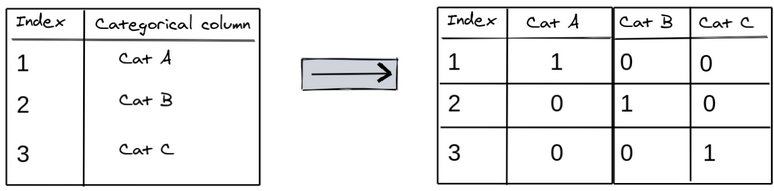

* One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column

In [51]:
raw_df[categ_colns].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

**We can perform one hot encoding using the OneHotEncoder class from sklearn.preprocessing.**

In [52]:
from sklearn.preprocessing import OneHotEncoder
?OneHotEncoder

In [53]:
encoder = OneHotEncoder(sparse=False, handle_unknown = 'ignore')

In [54]:
encoder.fit(raw_df[categ_colns])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [55]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

* **The encoder has created a list of categories for each of the categorical columns in the dataset.**

* **We can generate column names for each individual category using get_feature_names_out **

In [56]:
encoded_colns = list(encoder.get_feature_names_out(categ_colns))
print(encoded_colns)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

**All of the above columns will be added to train_inputs, val_inputs and test_inputs.**

**To perform the encoding, we use the transform method of encoder.**

In [57]:
train_inputs[encoded_colns] = encoder.transform(train_inputs[categ_colns])
val_inputs[encoded_colns] = encoder.transform(val_inputs[categ_colns])
test_inputs[encoded_colns] = encoder.transform(test_inputs[categ_colns])

/tmp/ipykernel_18/352156830.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_18/352156830.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_18/352156830.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_18/352156830.py:1: PerformanceWarning:

DataFr

**We can verify that these new columns have been added to our training, test and validation sets.**

In [58]:
pd.set_option('display.max_columns', None)

In [59]:
test_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2498     Albury  0.681604  0.801512  0.000000          NaN       NaN   
2499     Albury  0.693396  0.725898  0.001078          NaN       NaN   
2500     Albury  0.634434  0.527410  0.005930          NaN       NaN   
2501     Albury  0.608491  0.538752  0.042049          NaN       NaN   
2502     Albury  0.566038  0.523629  0.018329          NaN       NaN   
...         ...       ...       ...       ...          ...       ...   
145454    Uluru  0.283019  0.502836  0.000000          NaN       NaN   
145455    Uluru  0.266509  0.533081  0.000000          NaN       NaN   
145456    Uluru  0.285377  0.568998  0.000000          NaN       NaN   
145457    Uluru  0.327830  0.599244  0.000000          NaN       NaN   
145458    Uluru  0.384434  0.601134  0.000000          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2498           ENE       0.372093        NaN        ESE      0.000000   
2499           SSE       0.341085        SSE         SE      0.069231   
2500           ENE       0.325581        ESE        ENE      0.084615   
2501           SSE       0.255814         SE        SSE      0.069231   
2502           ENE       0.193798         SE        SSE      0.046154   
...            ...            ...        ...        ...           ...   
145454           E       0.193798        ESE          E      0.115385   
145455           E       0.193798         SE        ENE      0.100000   
145456         NNW       0.124031         SE          N      0.100000   
145457           N       0.240310         SE        WNW      0.069231   
145458          SE       0.170543        SSE          N      0.100000   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2498        0.080460         0.46         0.17     0.543802       0.5136   
2499        0.195402         0.54         0.30     0.505785       0.5008   
2500        0.448276         0.62         0.67     0.553719       0.6032   
2501        0.195402         0.74         0.65     0.618182       0.6304   
2502        0.103448         0.92         0.63     0.591736       0.5888   
...              ...          ...          ...          ...          ...   
145454      0.149425         0.59         0.27     0.730579       0.7056   
145455      0.126437         0.51         0.24     0.728926       0.6912   
145456      0.103448         0.56         0.21     0.710744       0.6720   
145457      0.103448         0.53         0.24     0.669421       0.6352   
145458      0.080460         0.51         0.24     0.642975       0.6304   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
2498    0.777778  0.333333  0.702532  0.808061        No                0.0   
2499    0.888889  0.888889  0.675105  0.712092        No                0.0   
2500    0.888889  0.888889  0.611814  0.477927       Yes                0.0   
2501    0.888889  0.888889  0.556962  0.518234       Yes                0.0   
2502    0.888889  0.888889  0.514768  0.529750       Yes                0.0   
...          ...       ...       ...       ...       ...                ...   
145454       NaN       NaN  0.350211  0.504798        No                0.0   
145455       NaN       NaN  0.364979  0.533589        No                0.0   
145456       NaN       NaN  0.381857  0.573896        No                0.0   
145457       NaN       NaN  0.415612  0.604607        No                0.0   
145458  0.333333  0.222222  0.470464  0.602687        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
2498                0.0              1.0                    0.0   
2499                0.0              1.0                    0.0   
2500                0.0              1.0                    0.0   
2501                0.0              1.0                    0.0   
2502                0.0              1.0                    0.0   
.

# **Training a Logisitic Regression Model**